In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('../01.Data_Collection/films.csv')

print(df.shape)
df.sample()

(817, 36)


,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,대표작가(필명),작가필모,작가코드,작가_대표역할,대표작가,작가성별,감독코드,대표감독,감독_대표역할,감독필모,감독성별
33,21.0,장수상회,2015.4.9,"8,737,364,643",1.0%,"8,737,364,643","1,165,780","1,165,780",688,"52,928",한국,한국,"(주)빅픽쳐,씨제이이앤엠(주)",씨제이이앤엠(주),12세이상관람가,"멜로/로맨스,드라마",강제규,"박해빛나,박근형,윤여정,조진웅,한지민,황우슬혜,문가영,찬열,장문규,이준혁,윤소희,백...",구청여직원,20140703,20239046.0,박해빛나,배우,여자,이상현,이상현,조작된 도시|시간이탈자|장수상회|돈 크라이 마미,20070071.0,시나리오(각본),이상현,남자,10000854.0,강제규,감독,나쁜놈은 죽는다 무삭제 특별판|나쁜놈은 죽는다|장수상회|뷰티풀 2014|마이 웨이|...,남자


In [39]:
df.dtypes

순위          float64
영화명          object
개봉일          object
매출액          object
매출액점유율       object
누적매출액        object
관객수          object
누적관객수        object
스크린수         object
상영횟수         object
대표국적         object
국적           object
제작사          object
배급사          object
등급           object
장르           object
감독           object
배우           object
배역명          object
영화코드          int64
배우코드        float64
주연배우         object
역할_배우        object
배우성별         object
작가           object
대표작가(필명)     object
작가필모         object
작가코드        float64
작가_대표역할      object
대표작가         object
작가성별         object
감독코드        float64
대표감독         object
감독_대표역할      object
감독필모         object
감독성별         object
F-rated       int64
dtype: object

In [21]:
f_rated = []
for i, row in df.iterrows():
    answer = 0
    if row['배우성별'] == '여자' : answer += 1
    if row['작가성별'] == '여자' : answer += 1
    if row['감독성별'] == '여자' : answer += 1
        
    f_rated.append(answer)
df['F-rated'] = f_rated
df.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,대표작가(필명),작가필모,작가코드,작가_대표역할,대표작가,작가성별,감독코드,대표감독,감독_대표역할,감독필모,감독성별,F-rated
326,73.0,목숨 건 연애,2016.12.14,"361,668,800",0.0%,"361,668,800","47,805","47,805",393,"5,786",한국,"한국,대만,중국",(주)비에이엔터테인먼트,오퍼스픽쳐스(유),15세이상관람가,"멜로/로맨스,코미디",송민규,"하지원,천정명,진백림,윤소희,오정세,송민정,정다원,정다원,이동욱,이병희,이상미,지동...",NaN,20155223,10087280.0,하지원,배우,여자,"송민규, 김바다",송민규,목숨 건 연애|마이 웨이|슈퍼스타 감사용|태극기 휘날리며|오버 더 레인보우|바이 준,10037076.0,감독,송민규,남자,10037076.0,송민규,감독,목숨 건 연애|마이 웨이|슈퍼스타 감사용|태극기 휘날리며|오버 더 레인보우|바이 준,남자,1


In [22]:
# corr 보기 위해 숫자로 표현된 컬럼만 남기기 + 식별을 위해 영화명, 영화코드 포함
df_in_digit = df[['영화명', '영화코드', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수', 'F-rated']]
df_in_digit = df_in_digit[df_in_digit['개봉일'].notnull()]
print(df_in_digit.isnull().sum())
print(df_in_digit.shape)
df_in_digit.sample()

영화명        0
영화코드       0
개봉일        0
매출액        0
매출액점유율     0
누적매출액      0
관객수        0
누적관객수      0
스크린수       0
상영횟수       0
F-rated    0
dtype: int64
(808, 11)


,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated
123,미안해 사랑해 고마워,20149961,2015.10.28,"359,247,800",0.0%,"359,247,800","51,207","51,207",344,"6,541",0


In [23]:
# 컬럼 dtype 변경
# 매출액, 매출액점유율, 누적매출액, 관객수, 누적관객수, 스크린수, 상영횟수 -> int
columns = ['매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']

for c in columns:
    print(c)
    print(df_in_digit[c].dtype)
    if c == '매출액점유율': df_in_digit[c] = df_in_digit[c].apply(lambda x: float(x.replace('%','')))
    else:
        df_in_digit[c] = df_in_digit[c].apply(lambda x: int(x.replace(',', '').replace('%','')))
    
df_in_digit.dtypes

매출액
object
매출액점유율
object
누적매출액
object
관객수
object
누적관객수
object
스크린수
object
상영횟수
object


영화명         object
영화코드         int64
개봉일         object
매출액          int64
매출액점유율     float64
누적매출액        int64
관객수          int64
누적관객수        int64
스크린수         int64
상영횟수         int64
F-rated      int64
dtype: object

In [24]:
df_in_digit['개봉일'] = pd.to_datetime(df_in_digit['개봉일'])
df_in_digit['year'] = pd.to_datetime(df_in_digit['개봉일']).dt.year
df_in_digit['month'] = pd.to_datetime(df_in_digit['개봉일']).dt.month
df_in_digit['day'] = pd.to_datetime(df_in_digit['개봉일']).dt.day
df_in_digit['dayofweek'] = pd.to_datetime(df_in_digit['개봉일']).dt.dayofweek

In [25]:
df_in_digit.corr()

,영화코드,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek
영화코드,1.000000,-0.019480,-0.009277,-0.019463,-0.027762,-0.027733,0.058139,-0.003340,0.006476,0.801542,0.033228,-0.001021,-0.090417
매출액,-0.019480,1.000000,0.997869,1.000000,0.999190,0.999192,0.776339,0.944985,-0.119088,0.013476,0.015759,-0.029194,-0.286490
매출액점유율,-0.009277,0.997869,1.000000,0.997875,0.995656,0.995667,0.772840,0.945209,-0.119098,0.025950,0.010284,-0.024255,-0.283503
누적매출액,-0.019463,1.000000,0.997875,1.000000,0.999187,0.999190,0.776384,0.945012,-0.119057,0.013537,0.015649,-0.029256,-0.286543
관객수,-0.027762,0.999190,0.995656,0.999187,1.000000,0.999999,0.775784,0.942876,-0.118595,0.003467,0.017222,-0.028603,-0.286909
누적관객수,-0.027733,0.999192,0.995667,0.999190,0.999999,1.000000,0.775841,0.942915,-0.118543,0.003546,0.017092,-0.028675,-0.286970
스크린수,0.058139,0.776339,0.772840,0.776384,0.775784,0.775841,1.000000,0.876827,-0.124366,0.130484,-0.011587,-0.002000,-0.447734
상영횟수,-0.003340,0.944985,0.945209,0.945012,0.942876,0.942915,0.876827,1.000000,-0.115358,0.048943,-0.014570,-0.020723,-0.347923
F-rated,0.006476,-0.119088,-0.119098,-0.119057,-0.118595,-0.118543,-0.124366,-0.115358,1.000000,0.051520,-0.015272,0.002478,0.057675
year,0.801542,0.013476,0.025950,0.013537,0.003467,0.003546,0.130484,0.048943,0.051520,1.000000,-0.126272,0.030652,-0.158594


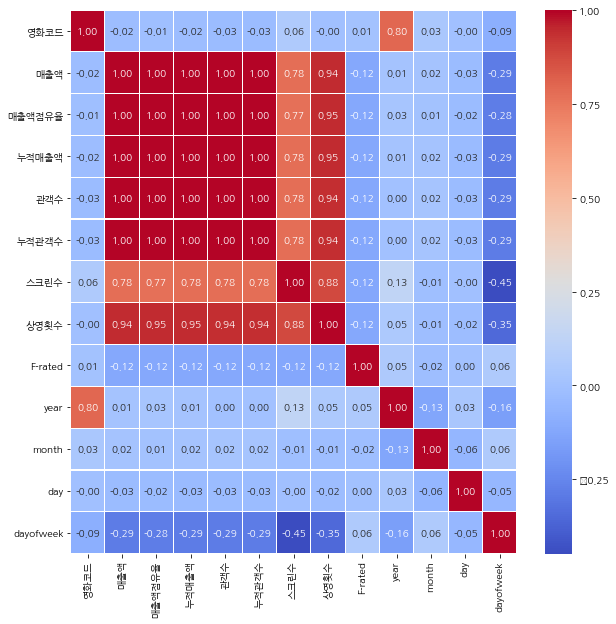

In [26]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_in_digit.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

### 상영횟수 분포

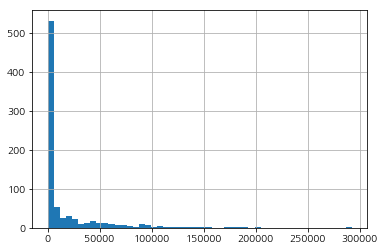

In [27]:
df_in_digit['상영횟수'].hist(bins=50)

In [28]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '대표작가(필명)', '작가필모',
       '작가코드', '작가_대표역할', '대표작가', '작가성별', '감독코드', '대표감독', '감독_대표역할', '감독필모',
       '감독성별', 'F-rated'],
      dtype='object')

In [29]:
df_in_digit['상영횟수(log)'] = df_in_digit['상영횟수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log)
802,세컨어카운트,20161410,2016-03-03,13173800,0.0,13173800,1465,1465,24,262,1,2016,3,3,3,5.568345


In [43]:
df_in_digit[df_in_digit['상영횟수'] < 500]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)
1,설해,20124398,2015-01-08,20767500,0.0,29770500,2796,3933,34,335,0,2015,1,8,3,5.814131,3.526361
4,꽃보다 처녀귀신,20155744,2015-01-15,7909000,0.0,7909000,1567,1567,5,42,0,2015,1,15,3,3.737670,1.609438
5,미라클 여행기,20148631,2015-01-15,20562500,0.0,21417500,3228,3399,12,320,1,2015,1,15,3,5.768321,2.484907
6,고양이 장례식,20144601,2015-01-15,23200900,0.0,23200900,2865,2865,46,394,0,2015,1,15,3,5.976351,3.828641
8,생각보다 맑은,20145202,2015-01-22,27393900,0.0,27393900,3881,3881,17,458,1,2015,1,22,3,6.126869,2.833213
10,비치하트애솔,20143753,2015-01-29,1563200,0.0,1827700,234,279,5,60,0,2015,1,29,3,4.094345,1.609438
11,어우동: 주인 없는 꽃,20149298,2015-01-29,60141000,0.0,68421000,12203,13123,19,381,0,2015,1,29,3,5.942799,2.944439
12,망원동 인공위성,20133803,2015-02-05,19509200,0.0,20876700,2560,2972,21,410,0,2015,2,5,3,6.016157,3.044522
17,기화,20149491,2015-02-26,5753500,0.0,5753500,831,831,5,41,0,2015,2,26,3,3.713572,1.609438
18,조류인간,20148685,2015-02-26,20120700,0.0,20685500,2640,2738,21,412,0,2015,2,26,3,6.021023,3.044522


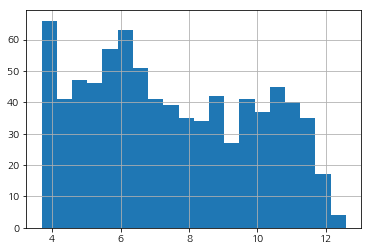

In [30]:
df_in_digit['상영횟수(log)'].hist(bins=20)

### 스크린수 분포

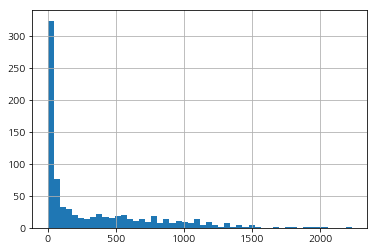

In [31]:
df_in_digit['스크린수'].hist(bins=50)

In [32]:
df_in_digit['스크린수(log)'] = df_in_digit['스크린수'].apply(lambda x: np.log(x))

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)
214,4등,20145182,2016-04-13,286355700,0.0,286355700,38611,38611,213,4726,1,2016,4,13,2,8.460834,5.361292


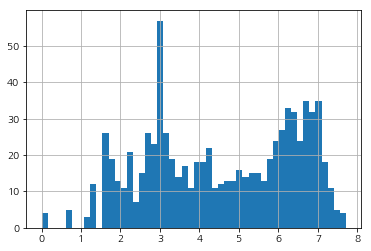

In [27]:
df_in_digit['스크린수(log)'].hist(bins=50)

스크린수보다 상영횟수가 더 불균형함

### 상영횟수(log) 기준으로 나누기
상영횟수(log) | 상영횟수 등급
-|-
0 < x <= 2 | 1
2 < x <= 4 | 2
4 < x <= 6 | 3
6 < x <= 8 | 4
8 < x <= 10 | 5
10 < x <= 12 | 6

In [29]:
df_in_digit[df_in_digit['상영횟수(log)'] == 0]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log)


In [32]:
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 12, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 10, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 8, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 6, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 4, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수(log)'] <= 2, '상영횟수등급'] = 1

df_in_digit.sample()

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급
274,브링 홈: 아버지의 땅,20133071.0,2016-09-01,117372200,0.0,117372200,15025,15025,36,547,0,2016,9,1,3,6.304449,3.583519,4.0


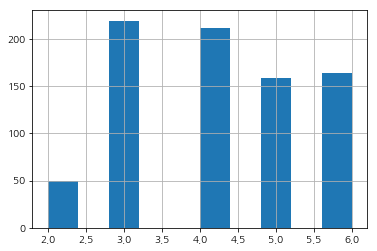

In [33]:
df_in_digit['상영횟수등급'].hist()

In [34]:
df_in_digit[df_in_digit['상영횟수등급'] == 6]['영화명']

2                   허삼관
3                오늘의 연애
7               강남 1970
14                  쎄시봉
15     조선명탐정 : 사라진 놉의 딸
20               순수의 시대
21                  헬머니
23                 살인의뢰
27                   스물
33                 장수상회
40                차이나타운
48               악의 연대기
51                   간신
52                  무뢰한
61                 극비수사
63                 연평해전
70                   손님
86               미쓰 와이프
89              뷰티 인사이드
101                  사도
106          탐정 : 더 비기닝
110              성난 변호사
119           특종: 량첸살인기
120                 더 폰
124                그놈이다
129              검은 사제들
138                내부자들
140          열정같은소리하고있네
157                  대호
158                히말라야
             ...       
661                스윙키즈
662                 마약왕
665           PMC: 더 벙커
667                 말모이
668              내안의 그놈
677                  뺑반
681                  증인
683                 사바하
685          항거:유관순 이야기
695                   돈
696             

상영횟수log 컬럼으로 등급을 나눴더니, log 스케일의 특성에 따라 상영횟수가 늘어날수록 차이가 큰 영화들이 같은 등급 내 포함된다

-> 상영횟수 칼럼으로 다시 나눠서 보기

상영횟수 | 상영횟수 등급
-|-
0 < x <= 100 | 1
2 < x <= 1000 | 2
4 < x <= 10_000 | 3
6 < x <= 30_000 | 4
8 < x <= 70_000 | 5
10 < x <= 100_000 | 6

In [6]:
df_in_digit[df_in_digit['상영횟수'] > 10000]['상영횟수'].hist(bins=100)

NameError: name 'df_in_digit' is not defined

In [123]:
df_in_digit[df_in_digit['상영횟수'] > 150_000]

,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,F-rated,year,month,day,dayofweek,상영횟수(log),스크린수(log),상영횟수등급,장르,등급
75,암살,20148851.0,2015-07-22,98463132781,11.2,98463132781,12705700,12705700,1519,175185,1,2015,7,22,2,12.073598,7.325808,NaN,"액션,드라마",15세이상관람가
79,베테랑,20148048.0,2015-08-05,105168155250,12.0,105168155250,13414009,13414009,1115,199231,0,2015,8,5,2,12.202220,7.016610,NaN,"액션,드라마",15세이상관람가
138,내부자들,20149314.0,2015-11-19,56465665657,6.4,56465665657,7055332,7055332,1129,152265,0,2015,11,19,3,11.933378,7.029088,6.0,"범죄,드라마",청소년관람불가
178,검사외전,20145507.0,2016-02-03,77320403264,8.3,77320403264,9707581,9707581,1812,153532,0,2016,2,3,2,11.941664,7.502186,6.0,"범죄,코미디",15세이상관람가
259,부산행,20156564.0,2016-07-20,93178283048,10.0,93178283048,11565479,11565479,1788,151315,0,2016,7,20,2,11.927119,7.488853,6.0,"액션,스릴러",15세이상관람가
295,럭키,20153444.0,2016-10-13,56444461256,6.1,56444461256,6975290,6975290,1234,155977,0,2016,10,13,3,11.957464,7.118016,6.0,코미디,15세이상관람가
416,택시운전사,20162869.0,2017-08-02,95853645649,10.6,95853645649,12186327,12186327,1906,184075,2,2017,8,2,2,12.123099,7.552762,NaN,드라마,15세이상관람가
592,신과함께-인과 연,20186202.0,2018-08-01,102666146909,11.2,102666146909,12274996,12274996,2235,179981,0,2018,8,1,2,12.100607,7.711997,NaN,"판타지,드라마",12세이상관람가
674,극한직업,20182530.0,2019-01-23,139648179516,17.6,139648179516,16264984,16264984,2003,292577,0,2019,1,23,2,12.586483,7.602401,NaN,코미디,15세이상관람가
732,기생충,20183782.0,2019-05-30,85865256245,10.8,85865256245,10083103,10083103,1948,192830,0,2019,5,30,3,12.169564,7.574558,NaN,드라마,15세이상관람가


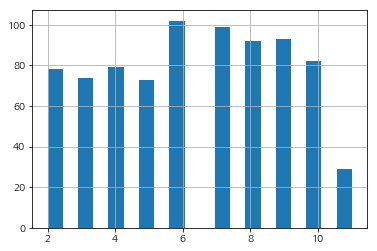

In [62]:
# 간격 줄이기
df_in_digit.loc[df_in_digit['상영횟수'] <= 100_000, '상영횟수등급'] = 11
df_in_digit.loc[df_in_digit['상영횟수'] <= 70_000, '상영횟수등급'] = 10
df_in_digit.loc[df_in_digit['상영횟수'] <= 30_000, '상영횟수등급'] = 9
df_in_digit.loc[df_in_digit['상영횟수'] <= 10_000, '상영횟수등급'] = 8
df_in_digit.loc[df_in_digit['상영횟수'] <= 3_000, '상영횟수등급'] = 7
df_in_digit.loc[df_in_digit['상영횟수'] <= 1_000, '상영횟수등급'] = 6
df_in_digit.loc[df_in_digit['상영횟수'] <= 500, '상영횟수등급'] = 5
df_in_digit.loc[df_in_digit['상영횟수'] <= 300, '상영횟수등급'] = 4
df_in_digit.loc[df_in_digit['상영횟수'] <= 150, '상영횟수등급'] = 3
df_in_digit.loc[df_in_digit['상영횟수'] <= 70, '상영횟수등급'] = 2
df_in_digit.loc[df_in_digit['상영횟수'] <= 30, '상영횟수등급'] = 1

df_in_digit['상영횟수등급'].hist(bins=20)

In [66]:
df_in_digit.groupby(['상영횟수등급'])['F-rated'].mean()

상영횟수등급
2.0     0.602564
3.0     0.554054
4.0     0.544304
5.0     0.849315
6.0     0.656863
7.0     0.878788
8.0     0.750000
9.0     0.602151
10.0    0.548780
11.0    0.586207
Name: F-rated, dtype: float64

에로영화가 많은 2~4등급을 지나면 F-rated 가 올라가다가 8등급을 기점으로 다시 줄어든다

In [85]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액점유율', '누적매출액', '관객수', '누적관객수', '스크린수',
       '상영횟수', '대표국적', '국적', '제작사', '배급사', '등급', '장르', '감독', '배우', '배역명',
       '영화코드', '배우코드', '주연배우', '역할_배우', '배우성별', '작가', '작가코드', '대표작가',
       '역할_시나리오(각본)', '작가성별', 'F-rated', '감독코드', '대표감독', '역할_감독', '감독성별'],
      dtype='object')

In [89]:
# df_in_digit = df_in_digit.merge(df[['영화코드', '장르']], how='left', on='영화코드')
# df_in_digit = df_in_digit.merge(df[['영화코드', '등급']], how='left', on='영화코드')
# df_in_digit = df_in_digit.drop(['장르_x', '장르_y'], axis=1)

# df_in_digit[df_in_digit['상영횟수등급'] == 2]['장르'].value_counts()
# df_in_digit[df_in_digit['상영횟수등급'] == 2][['영화명', '장르']]

df_in_digit[df_in_digit['상영횟수등급'] == 2]['등급'].value_counts()
df_in_digit.groupby(['상영횟수등급', '등급'])['영화명'].size()

상영횟수등급  등급      
2.0     12세이상관람가    13
        15세이상관람가    18
        전체관람가        6
        청소년관람불가     41
3.0     12세이상관람가    21
        15세이상관람가    16
        전체관람가       11
        청소년관람불가     26
4.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가        9
        청소년관람불가     20
5.0     12세이상관람가    26
        15세이상관람가    23
        전체관람가       19
        청소년관람불가      5
6.0     12세이상관람가    27
        15세이상관람가    40
        전체관람가       28
        청소년관람불가      7
7.0     12세이상관람가    20
        15세이상관람가    30
        전체관람가       34
        청소년관람불가     15
8.0     12세이상관람가    15
        15세이상관람가    41
        전체관람가       24
        청소년관람불가     12
9.0     12세이상관람가    21
        15세이상관람가    44
        전체관람가       14
        청소년관람불가     14
10.0    12세이상관람가    21
        15세이상관람가    44
        전체관람가        3
        청소년관람불가     14
11.0    12세이상관람가    16
        15세이상관람가     9
        전체관람가        1
        청소년관람불가      3
Name: 영화명, dtype: int64

<Figure size 1152x432 with 0 Axes>

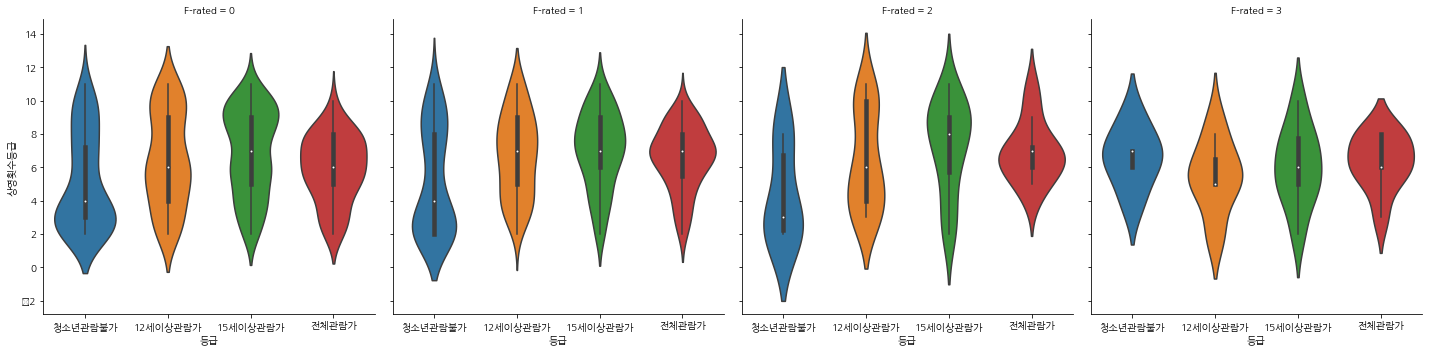

In [108]:
plt.figure(figsize=[16, 6])

sns.catplot(x='등급', col='F-rated', y='상영횟수등급',kind='violin', data=df_in_digit)
plt.show()

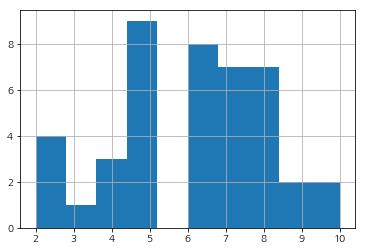

In [111]:
df_in_digit[df_in_digit['F-rated'] == 3]['상영횟수등급'].hist()

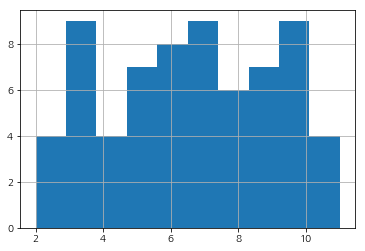

In [112]:
df_in_digit[df_in_digit['F-rated'] == 2]['상영횟수등급'].hist()

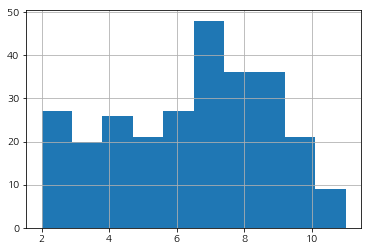

In [113]:
df_in_digit[df_in_digit['F-rated'] == 1]['상영횟수등급'].hist()

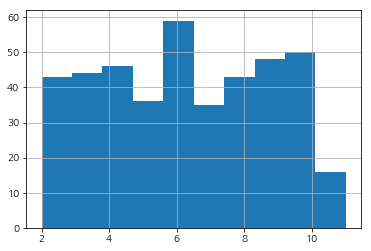

In [114]:
df_in_digit[df_in_digit['F-rated'] == 0]['상영횟수등급'].hist()